In [1]:
'''
File name: Comments.ipynb
Author: Lolo
Date created: 12/11/2022
Date last modified: 18/11/2022
Python Version: 3.9.12
'''

'\nFile name: Comments.ipynb\nAuthor: Lolo\nDate created: 12/11/2022\nDate last modified: 18/11/2022\nPython Version: 3.9.12\n'

In [2]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#set the seed
np.random.seed(4)

DATA_PATH = './data/'
DEFAULT_ENCODING = 'UTF8'
DEFAULT_COMPRESSION = 'gzip'

## Taking csv tranformed file from Flo

In [3]:
df_BA_reviews = pd.read_csv(DATA_PATH + 'df_BA_reviews.csv')

In [4]:
df_BA_reviews.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 10:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 11:00:00,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13 11:00:00,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01 11:00:00,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30 10:00:00,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."


## Visualizations
### length of the comments

#### with subset of the data

In [5]:
df_BA_subset = df_BA_reviews.loc[0:999]

In [6]:
nbr_words_per_comment_subset = list(map(len,df_BA_subset['text']))

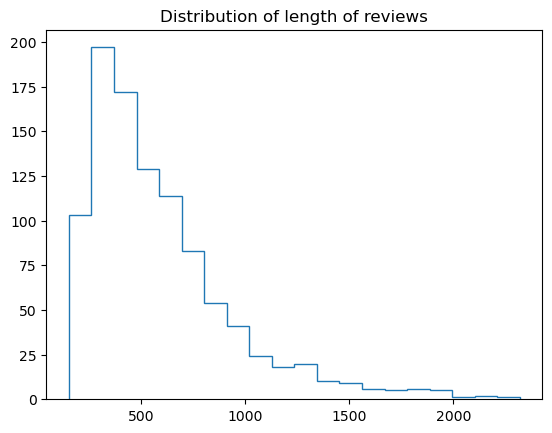

In [7]:
plt.hist(nbr_words_per_comment_subset, bins=20,histtype='step')
plt.title('Distribution of length of reviews')
plt.show()


#### with whole data

In [8]:
BA_texts = df_BA_reviews['text'].copy() # So we don't mess with the actual dataframe

In [9]:
nbr_words_per_comment = list(map(len,BA_texts))

TypeError: object of type 'float' has no len()

We get an **error** since some comments are *float* instead of *string*.

In [10]:
list_types = list(map(type,BA_texts)) # get the a list of the type for each row
print(f'Number of comment that are float: {list_types.count(float)}')

Number of comment that are float: 2


In [11]:
# transforming the 2 float comments into strings

for i in range(list_types.count(float)):
    index_to_transform_to_string = list_types.index(float)
    BA_texts[index_to_transform_to_string] = str(BA_texts[index_to_transform_to_string]) #transform the float to a str

    list_types = list(map(type,BA_texts))# update list of types


#making sure there is no float anymore
print(f'Number of comment that are float: {list_types.count(float)}')



Number of comment that are float: 0


In [12]:
nbr_words_per_comment = list(map(len,BA_texts))

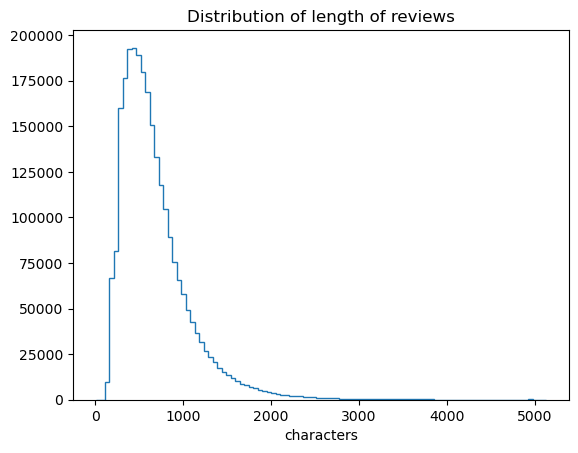

In [13]:
plt.hist(nbr_words_per_comment, bins=100,log=False,histtype='step')
plt.title('Distribution of length of reviews')
plt.xlabel('characters')
plt.show()


### Number of comments per users

In [14]:
df_BA_users = pd.read_csv(DATA_PATH + 'BeerAdvocate/users.csv')

In [15]:
df_BA_users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [16]:
#switching format of date for sec to YYYY MM DD hours:min:sec
df_BA_users['joined'] = pd.to_datetime(df_BA_users['joined'],unit = 's')

In [17]:
df_BA_users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,Northern Ireland


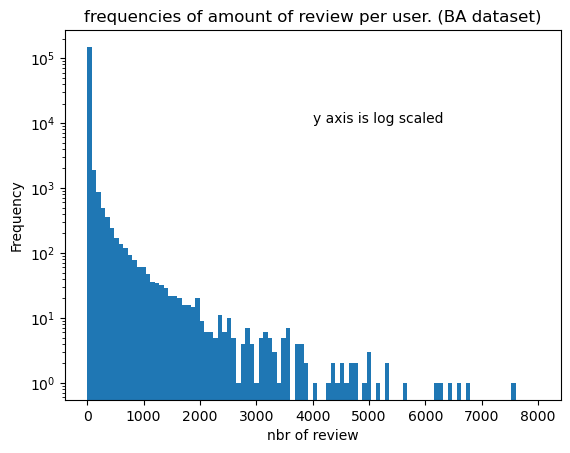

In [18]:
df_BA_users['nbr_reviews'].plot.hist(bins=100, range=[0,8000], log = True)
plt.title('frequencies of amount of review per user. (BA dataset)')
plt.xlabel('nbr of review')
plt.text(4000,10000,'y axis is log scaled')
plt.show()

There is a huge proportion of low number of comments. Let's zoom in

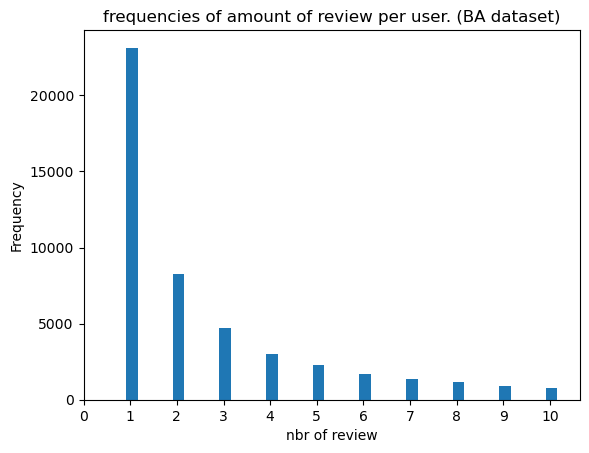

In [71]:
df_BA_users['nbr_reviews'].plot.hist(bins=np.arange(0.66, 10.33, 0.25), log = False)
plt.title('frequencies of amount of review per user. (BA dataset)')
plt.xlabel('nbr of review')
plt.xticks(range(11))
plt.text(5,20000,'')
plt.show()

I'll separate the user into two datasets: with and without comments.

In [20]:
df_user_nocomment = df_BA_users[df_BA_users.nbr_reviews.isin([0])]
print(f'There are {df_user_nocomment.size} of users without any comments')

df_user_comments = df_BA_users[~df_BA_users.nbr_reviews.isin([0])]
print(f'There are {df_user_comments.size} of users with at least 1 comment')

There are 548712 of users without any comments
There are 373512 of users with at least 1 comment


### Trying to do a sentiment analysis on comments and see how it correlates with ratings

#### setting up the sentiment analysis algo

In [73]:
# taken from distilbert-base-uncased-distilled-squad on huggingface.co
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

#### First trying with a small sample. Computationally expensive

In [22]:
#choose the first 1000 texts with <512 length
small_text_dataset = BA_texts[0:10000].copy()
mylen = np.vectorize(len)                         # apply len() to each element and return an array with the results
mask = mylen(small_text_dataset.values) < 512     # make a boolean mask with elements only shorter than 512 char. It is the max length for a string for the sentiment analysis
small_text_shorter_than_512_char = pd.Series(small_text_dataset.values[mask], small_text_dataset.index[mask]) #apply the mask

Here are the 10'000 first reviews, from which shorter than 512 char were kept. We do that because the max string length for the sentiment analysis algo is set to 512 char. (We can change that later if needed)

In [23]:
small_text_shorter_than_512_char

0       From a bottle, pours a piss yellow color with ...
1       Pours pale copper with a thin head that quickl...
2       500ml Bottle bought from The Vintage, Antrim.....
4       500ml bottlePours with a light, slightly hazy ...
6       Poured from a 12 ounce bottle into a pilsner g...
                              ...                        
9986    This beer poured a brown color with a thin tan...
9991    A: 1/2&quot; tan head - hazy dark brown body -...
9993    11.2oz bottle poured into a tulip glass. Pours...
9994    I had read alot about this beer and wanted to ...
9997    Poured into a chalice a nice clean/clear dark ...
Length: 4172, dtype: object

Here the sentiment analysis is performed. It returns an array of either '1' for positive or '0' for negative.

In [24]:
list_of_results = []

# It loops over all reviews
for text in small_text_shorter_than_512_char:
    
    # For each reviews it returns the sentiment. Either positive or negative.
    # But first it needs to tokenize the string so the ML algo can use it
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits

    list_of_results.append(logits.argmax().item())
print(list_of_results)

[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 

I'll then use this array to separate our data into positive and negative. Masks will be use for this. So the int array is converted to a boolean array.

In [25]:
# Same as earlier, np.vectorize let us map the bool() to the array
mybool = np.vectorize(bool)
mask_of_results = mybool(list_of_results)

The mask is finally used on the Pandas Serie's indexes. Then we get the indexes for positive texts and negative texts.

In [26]:
small_text_shorter_than_512_char.index


Int64Index([   0,    1,    2,    4,    6,    8,   13,   14,   16,   17,
            ...
            9978, 9980, 9982, 9984, 9985, 9986, 9991, 9993, 9994, 9997],
           dtype='int64', length=4172)

In [27]:
index_pos = small_text_shorter_than_512_char.index[mask_of_results]
index_neg = small_text_shorter_than_512_char.index[~mask_of_results]

We view the ratings. 'overall' is the what the user gave in the end. and 'rating' is the average of all ratings for each sensory feature.

In [28]:
# viewing ratings
df_BA_reviews[['overall', 'rating']].head()

,overall,rating
0,3.0,2.88
1,3.5,3.67
2,3.5,3.73
3,4.5,3.98
4,4.0,4.00


Finally seeing the overall ratings of positive and negative reviews.

In [29]:
# Positive
df_BA_reviews['overall'][index_pos].describe()

count    3086.000000
mean        3.905298
std         0.499030
min         1.000000
25%         3.500000
50%         4.000000
75%         4.000000
max         5.000000
Name: overall, dtype: float64

In [30]:
# Negative
df_BA_reviews['overall'][index_neg].describe()

count    1016.000000
mean        3.276329
std         0.725322
min         1.000000
25%         3.000000
50%         3.500000
75%         3.750000
max         5.000000
Name: overall, dtype: float64

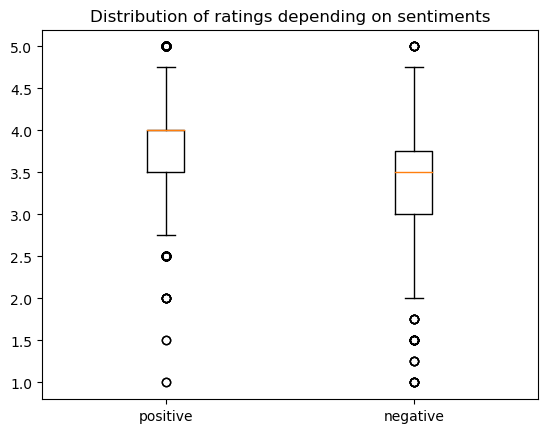

In [199]:

plt.title('Distribution of ratings depending on sentiments')
plt.boxplot([df_BA_reviews['overall'][index_pos].dropna(),df_BA_reviews['overall'][index_neg].dropna()])

plt.xticks([1,2], ['positive','negative'])
plt.show()